<center><h1>NLP (Natural Language Processing)</h1></center>
<p> <b> Data set : </b>https://www.kaggle.com/datasets/kazanova/sentiment140?select=training.1600000.processed.noemoticon.csv </p>

<h2>Understanding Data Set</h2>
<br>
    Data Set ada 6 kolum
    <li>target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
    <li>date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
    <li>flag: The query (lyx). If there is no query, then this value is NO_QUERY.
    <li>user: the user that tweeted (robotickilldozr)
    <li>text: the text of the tweet (Lyx is cool)
        
   <h3>Rename data set jadi : twitter16m.csv </h3>
       
 Library :
 <li> SpaCy

    
Donwload SpaCy


In [1]:
# pip install -U spacy
# pip install -U spacy-lookups-data
# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg

<center><h2>Yang akan dipelajari</h2></center>
     
 <h2> General Feature Extraction </h2>
               <li>File loading
               <li>Word counts
               <li>Characters count
               <li>Average cahr per word
               <li>Stop words count
               <li>Caount #hashtags and @mentions
               <li>If numeric digits are present in tweets
               <li>Upper case word counts
   <br>                
<h2> Processing and Cleaning </h2>
<li>Lower Case
<li>Contraction to Expansion
<li>Email removal and counts
<li>Removal of RT
<li>Removal special characaters
<li>Removal of multiple spaces
<li>Removal Html TAGS
<li>Removal of accented chars
<li>Removal of stop Word
<li>Conversion into base from of words
<li>Common Occuring words Removal
<li>Rare Ocuring Words Removal
<li>Word Cloud
<li>Spelling Correction
<li>Tokenization
<li>Lemmatization
<li>Detecting Entities Using NER
<li>Noun Detection
<li>Language Detection
<li>Sentence Translation
<li>Using Inbuilt Sentiment Clasifier
   <br>                
<h2>Advanced Text Processing and Feature Extraction</h2>
<li>N-Gram, Bi-Gram etc
<li>Bag of Words (BoW)
<li>Term Frequency Calculation TF
<li>Inverse Document Frequency
<li>TFIDF Term Frequency Inverse Document
<li>Word Embedding Word2Vec using SpaCy
    <br>
    <h2>Machine Learning Models for Text Clasification</h2>
<li>SGDClassifier
<li>LogisticRegression
<li>LogisticRegressionCV
<li>LinerarSVC
<li>RandomForestClasifier


<center><h1>Genereal Feature Extraction</h1></center>

In [3]:
#import library
import pandas as pd
import numpy as np

In [4]:
#import library spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [5]:
#read csv file using pandas
df = pd.read_csv('twitter16m.csv', encoding ='latin1', header = None)

In [6]:
#see few lines of df
df.head()
#it has total 6 columns

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
#only get colum n0 and 5
df= df[[5, 0]]

In [8]:
#make a new column name
df.columns = ['twitts', 'sentiment']

#see the head of the data
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [9]:
#get the sentiment columns value
df['sentiment'].value_counts()
#and we can see there are 8k rows for sentiment 4
#and we can see 8l row s for sentiment 0

0    800000
4    800000
Name: sentiment, dtype: int64

In [10]:
#see mapping the sentiment
#sent_map is like dictionary

#0 = negative sentiment
#
sent_map = {0: 'negative', 4: 'positive'}

#we are going to extract the feature

### Word Counts

In [11]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

#lamba id use to get data frame row by row
#so each row will be past on x vaiable
#so we are now going to calculate total number words
#to use wee
#we use str because some tweet there are numeric char 
#numeric char cannot be splitted

#so we must first converting the chart into the string
#and applying split

#then will produce list of words
#on list word im calculating the lenght of that words

#and then we can see that word will be calculated

#and save on new column = word_counts

In [12]:
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### Character Count

In [13]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))

#will get lenght that variabel x

In [14]:
df.head()
#so we have 2 faeture
#word counts and cha

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Avarage Word Lenght
calculate char in each word or lenght of each word

In [15]:
#create function we will use
def get_avg_world_len(x):
    words = x.split() #total words
    word_len = 0
    for word in words:
        word_len = word_len + len(word)  #calculating the len of each word one by one
    return word_len/len(words) #=! len(x)/len(words)

#will be return this world of lenght devide by total lenght of words
#thats mean how many words are present in each row


In [16]:
#how many characters in each word on avarage

df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_world_len(x))


In [17]:
#to understand lets see the example

len("this is nlp lesson")/4

#len of total char
#and we have 4 word

4.5

In [18]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


## Stop Words Count

In [19]:
print(STOP_WORDS)

#stop words are each words are those occurs very frequently on text data
#common words

{'though', 'now', '’ll', 'several', 'those', 'nine', 'regarding', 'these', 'are', 'take', 'becoming', 'yet', 'top', 'become', 'serious', 'latter', 'was', 'through', 'how', 'our', 'in', 'least', 'get', 'which', 'nevertheless', 'next', 'latterly', 'ourselves', 'three', 'already', '‘m', '‘ve', 'or', "n't", 'very', 'few', 'together', 'first', 'often', 'due', 'empty', '‘ll', 'wherein', 'seem', 'anywhere', 'whenever', 'its', 'name', "'d", 'one', 'whoever', 'four', 'above', 'such', 'ever', 'should', 'around', 'something', 'again', 'give', 'during', 'any', 'can', 'he', 'whence', 'show', 'former', 'than', 'thru', 'many', 'to', 'after', 'third', 'among', 'thereby', 'last', 'anyway', 'towards', 'whereupon', 'under', 'your', 'not', 'yours', 'somehow', 'used', 'namely', 'enough', 'put', 'without', 'up', 'meanwhile', 'whither', 'as', 'however', 'until', "'ve", 'always', 'beside', 'various', 'neither', 'most', '’s', 'hers', 'into', '‘re', 'elsewhere', 'we', 'call', 'two', 'an', 'therein', 'did', 're'

In [20]:
x = "this is text data"

In [21]:
x.split()

['this', 'is', 'text', 'data']

In [22]:
[t for t in x.split() if t in STOP_WORDS]

['this', 'is']

In [23]:
len([t for t in x.split() if t in STOP_WORDS])

2

In [24]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

#calculte the len of stop word
#split the x into the word
#check word by word if that is present  into stop word

In [25]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


### Count #Hashtag and Mentions

In [26]:
x = 'this #hashtag and this is @mentions'

In [27]:
[t for t in x.split() if t.startswith("#")]

['#hashtag']

In [28]:
df['hashtags_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith("#")]))
df['mentions_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t.startswith("@")]))

In [29]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


### if numeric digits are oresent in twitts

In [30]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [31]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


### Uppercase words count
people happy or rage ussualy type on uppercase

In [32]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [33]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [34]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

# Preprocessing and Cleaning

will be removing hashtag mentions or special char etc

### Lower case conversion

In [35]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [36]:
df.head(2)
#see all the twiits will be convert to lower case

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0


### Contarction to Expansion

In [37]:
#example
x = "i don't know what you want"

#don't is contraction
#can't he'll

#contraction should be expanded before we do a further processing
#this help to help the meaning or context of that santence


In [38]:
contractions = {
    "ain't": "am not",
    "amn't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "d'ye": "do you",
    "e'er": "ever",
    "everybody's": "everybody is",
    "everyone's": "everyone is",
    "finna": "fixing to",
    "g'day": "good day",
    "gimme": "give me",
    "giv'n": "given",
    "gonna": "going to",
    "gon't": "go not",
    "gotta": "got to",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'll": "he shall",
    "he's": "he has",
    "he've": "he have",
    "how'd": "how did",
    "howdy": "how do you do",
    "how'll": "how will",
    "how're": "how are",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'm": "i am",
    "i'm'a": "i am about to",
    "i'm'o": "i am going to",
    "innit": "is it not",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "may've": "may have",
    "methinks": "me thinks",
    "mightn't": "might not",
    "might've": "might have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "must've": "must have",
    "needn't": "need not",
    "ne'er": "never",
    "o'clock": "of the clock",
    "o'er": "over",
    "ol'": "old",
    "oughtn't": "ought not",
    "'s": "is, has, does, or us",
    "shalln't": "shall not",
    "shan't": "shall not",
    "she'd": "she had",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "somebody's": "somebody is",
    "someone's": "someone has",
    "something's": "something has",
    "so're": "so are",
    "that'll": "that will",
    "that're": "that are",
    "that's": "that is",
    "that'd": "that had",
    "there'd": "there would",
    "there'll": "there will",
    "there're": "there are",
    "there's": "there is",
    "these're": "these are",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "hey were",
    "they've": "they have",
    "this's": "this has",
    "those're": "those are",
    "'tis": "it is",
    "to've": "to have",
    "'twas": "it was",
    "wanna": "want to",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what'll": "what will",
    "what're": "what are/what were",
    "what's": "what is",
    "what've": "what have",
    "when's": "when hass",
    "where'd": "where did",
    "where're": "where are",
    "where's": "where is",
    "where've": "where have",
    "which'll": "which will",
    "which's": "which is",
    "whilst": "while still",
    "who'd": "who had",
    "who'd've": "who would have",
    "who'll": "who will",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "why'd": "why did",
    "why're": "why are",
    "why's": "why is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "y'all": "you all",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "you'd": "you had",
    "you'll": "you shall",
    "you're": "you are",
    "you've": "you have",
    "noun's": "noun is",
    "noun're": "noun are",
    " u ": " you ",
    " ur ": " your ",
    " n ": " and "
  }

In [39]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [40]:
x = "hi, i'd be happy"
cont_to_exp(x)

'hi, i would be happy'

In [41]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

CPU times: total: 57 s
Wall time: 57.2 s


In [42]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


### Count Remove Emails

In [43]:
import re
#regex

In [44]:
x = 'hi email me at email@mail.com another@mail.com'

In [45]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

['email@mail.com', 'another@mail.com']

In [46]:
%%time
df['emails'] =df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

CPU times: total: 7.2 s
Wall time: 7.23 s


In [47]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [48]:
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,"@laureystack awh...thatis, has, does, or us ki...",0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [49]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)

'hi email me at  '

In [50]:
#remove email
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

In [51]:
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,"@laureystack awh...thatis, has, does, or us ki...",0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


### Remove RT

In [52]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))

In [53]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0


### Special Chars removal or punctuation removal

In [54]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [55]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,switchfoot httptwitpiccom2y1zl - awww thatis h...,0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0


### Remove multiple spaces

In [56]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

In [57]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,switchfoot httptwitpiccom2y1zl - awww thatis h...,0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0


### Remove HTML tags

In [58]:
from bs4 import BeautifulSoup
#use for scraping website

In [59]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

CPU times: total: 6min 16s
Wall time: 6min 17s


In [60]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,switchfoot httptwitpiccom2y1zl - awww thatis h...,0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0


### Remove Accented Chars

In [61]:
import unicodedata

In [62]:
def remove_accented_chars(X):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [63]:
df['twitts'] = df['twitts']

## Spacy and NLP

### Remove Stop Words

In [64]:
import spacy

In [65]:
x = "this is stop words removal code is a the an how that"

In [66]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [67]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [68]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,switchfoot httptwitpiccom2y1zl - awww thatis b...,0,19,115,5.052632,4,0,1,0,1,[],0
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0


### Convert into base or root form of word

In [69]:
nlp = spacy.load('en_core_web_sm')

In [70]:
x = "kenichan dived times ball managed save 50 rest"

In [71]:
# dive = devide, time = times, manage = managed
#why base form is required?
#bcoz if its not converted into baseform,
#then the vocabulary library will be large

In [72]:
# x = 'i you he she they is am are'

In [73]:
def make_to_base(x):
    x_list= []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))
        

In [74]:
make_to_base(x)

kenichan dive time ball manage save 50 rest


### Common words removal

dont have much meaning

In [75]:
' '.join(df.head()['twitts'])

'switchfoot httptwitpiccom2y1zl - awww thatis bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [76]:
text = ' '.join(df['twitts'])

In [77]:
text = text.split()

In [78]:
freq_comm = pd.Series(text).value_counts()

In [79]:
f20 = freq_comm[:20]

In [80]:
#remove coomon words on the top 20
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

In [81]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,switchfoot httptwitpiccom2y1zl awww thatis bum...,0,19,115,5.052632,4,0,1,0,1,[],0
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0


### Rare words removal

In [82]:
rare20 = freq_comm[-20:]

In [83]:
rare20

generatorlunch                     1
xroryx                             1
windtalkers                        1
sadieozesoy                        1
prudeand                           1
androidevery                       1
iths                               1
sakeits                            1
httpwwwhdnetconcertrequestshtml    1
raidens                            1
sarahkarpward                      1
deemobrown                         1
mealswaiting                       1
karols                             1
stroky                             1
rebeccamissing                     1
boubywasthere                      1
gggarmen                           1
waants                             1
speakinguph4h                      1
dtype: int64

In [84]:
rare = freq_comm[freq_comm.values ==1]

In [85]:
rare

httptwitpiccom3ytzm    1
chrisjhudson           1
goneoldest             1
pdfis                  1
boydface               1
                      ..
rebeccamissing         1
boubywasthere          1
gggarmen               1
waants                 1
speakinguph4h          1
Length: 600604, dtype: int64

In [86]:
#bacuese use rare will use so much time we will use rare20

df['twitts'] =df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [87]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
0,switchfoot httptwitpiccom2y1zl awww thatis bum...,0,19,115,5.052632,4,0,1,0,1,[],0
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0


### Word Cloud Visualization
will be seing the words in the form of images

pip install wordcloud

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
x = ' '.join(text[:20000])

In [94]:
len(text)

10918429

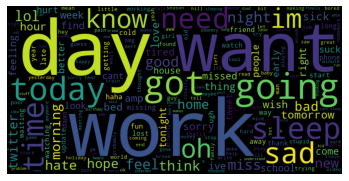

In [96]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis("off")
plt.show()

### Spelling Correction

install textblob

In [97]:
from textblob import TextBlob

In [98]:
x = 'tanks forr waching this vidio'

In [99]:
x = TextBlob(x).correct()

In [100]:
x

TextBlob("tank for watching this video")

### Tokenization

In [106]:
x = 'Thanks#watching this video, please like it'

In [107]:
TextBlob(x).words

WordList(['Thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [108]:
doc = nlp(x)
for token in doc:
    print(token)

Thanks#watching
this
video
,
please
like
it


In [ ]:
#textblob not give special char
#spacy give special char

### Lemmetization


In [114]:
import nltk
nltk.download('omw-1.4')

ERROR! Session/line number was not unique in database. History logging moved to new session 86


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aldin_yd2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [115]:
x = "runs run running ran"

In [116]:
from textblob import Word

In [117]:
#use textbloob
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [118]:
#use spacy
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


In [ ]:
#continue use spacy

### Detect Entities using NER of Spacing

In [122]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [123]:
#we want to get the entities
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
    

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [124]:
from spacy import displacy

In [125]:
displacy.render(doc, style = 'ent')
#gpe geopilitical entity

### Detecting Nouns

In [126]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [127]:
for noun in doc.noun_chunks:
    print(noun)

Donald Trump
the president
the USA
a deal
the moon


### Translation and Language Detection

In [128]:
#use textblob
tb = TextBlob(x)

In [132]:
# tb.detect_language() get 404 bad request error

### Use inbuilt sentiment classifier

In [134]:
#use textblob
from textblob.sentiments import NaiveBayesAnalyzer

In [138]:
x = "we all are sufering from corona"

In [139]:
#we will detect detect sentiment use inbuild textblob
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [140]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.75616044472398, p_neg=0.2438395552760203)

## Advanced Text Processing

### N-Grams
n-grams is combination of multiple words used together
n == 1 is unigram


In [141]:
x = "thanks for watching"
#we have 3 words

In [143]:
tb = TextBlob(x)

In [145]:
tb.ngrams(1)

[WordList(['thanks']), WordList(['for']), WordList(['watching'])]

### Bag of Words 'BoW'
technique to extract the feature

In [146]:
x = ['this is first sentence', 'this is second', 'this is last']

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

In [151]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [152]:
text_counts
#this is sparse matrix
#this is a text data sentence
#them count vectorize is counting each of first  of all is getting the unique words 
#from this whole list
#and counting how many unique words has occured

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [153]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [154]:
cv.get_feature_names()
#so this is words which is unique words

C:\Users\aldin_yd2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['first', 'is', 'last', 'second', 'sentence', 'this']

In [156]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [157]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [158]:
x

['this is first sentence', 'this is second', 'this is last']

### Term Frequency
is kind of bow, term freq only normalized, bow simply count


Term frequency is of the count of a word present in a sentence, to the length of the sentence.

In [160]:
x

['this is first sentence', 'this is second', 'this is last']

In [161]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [162]:
bow.shape
# 3 row 6 col

(3, 6)

In [174]:
tf = bow/bow.shape[1]

In [176]:
for index, row in enumerate(bow.iterrows()):
    for col in row[1].index:
        bow.loc[index, col] = bow.loc[index, col]/sum(row[1].values)

In [177]:
bow

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333
